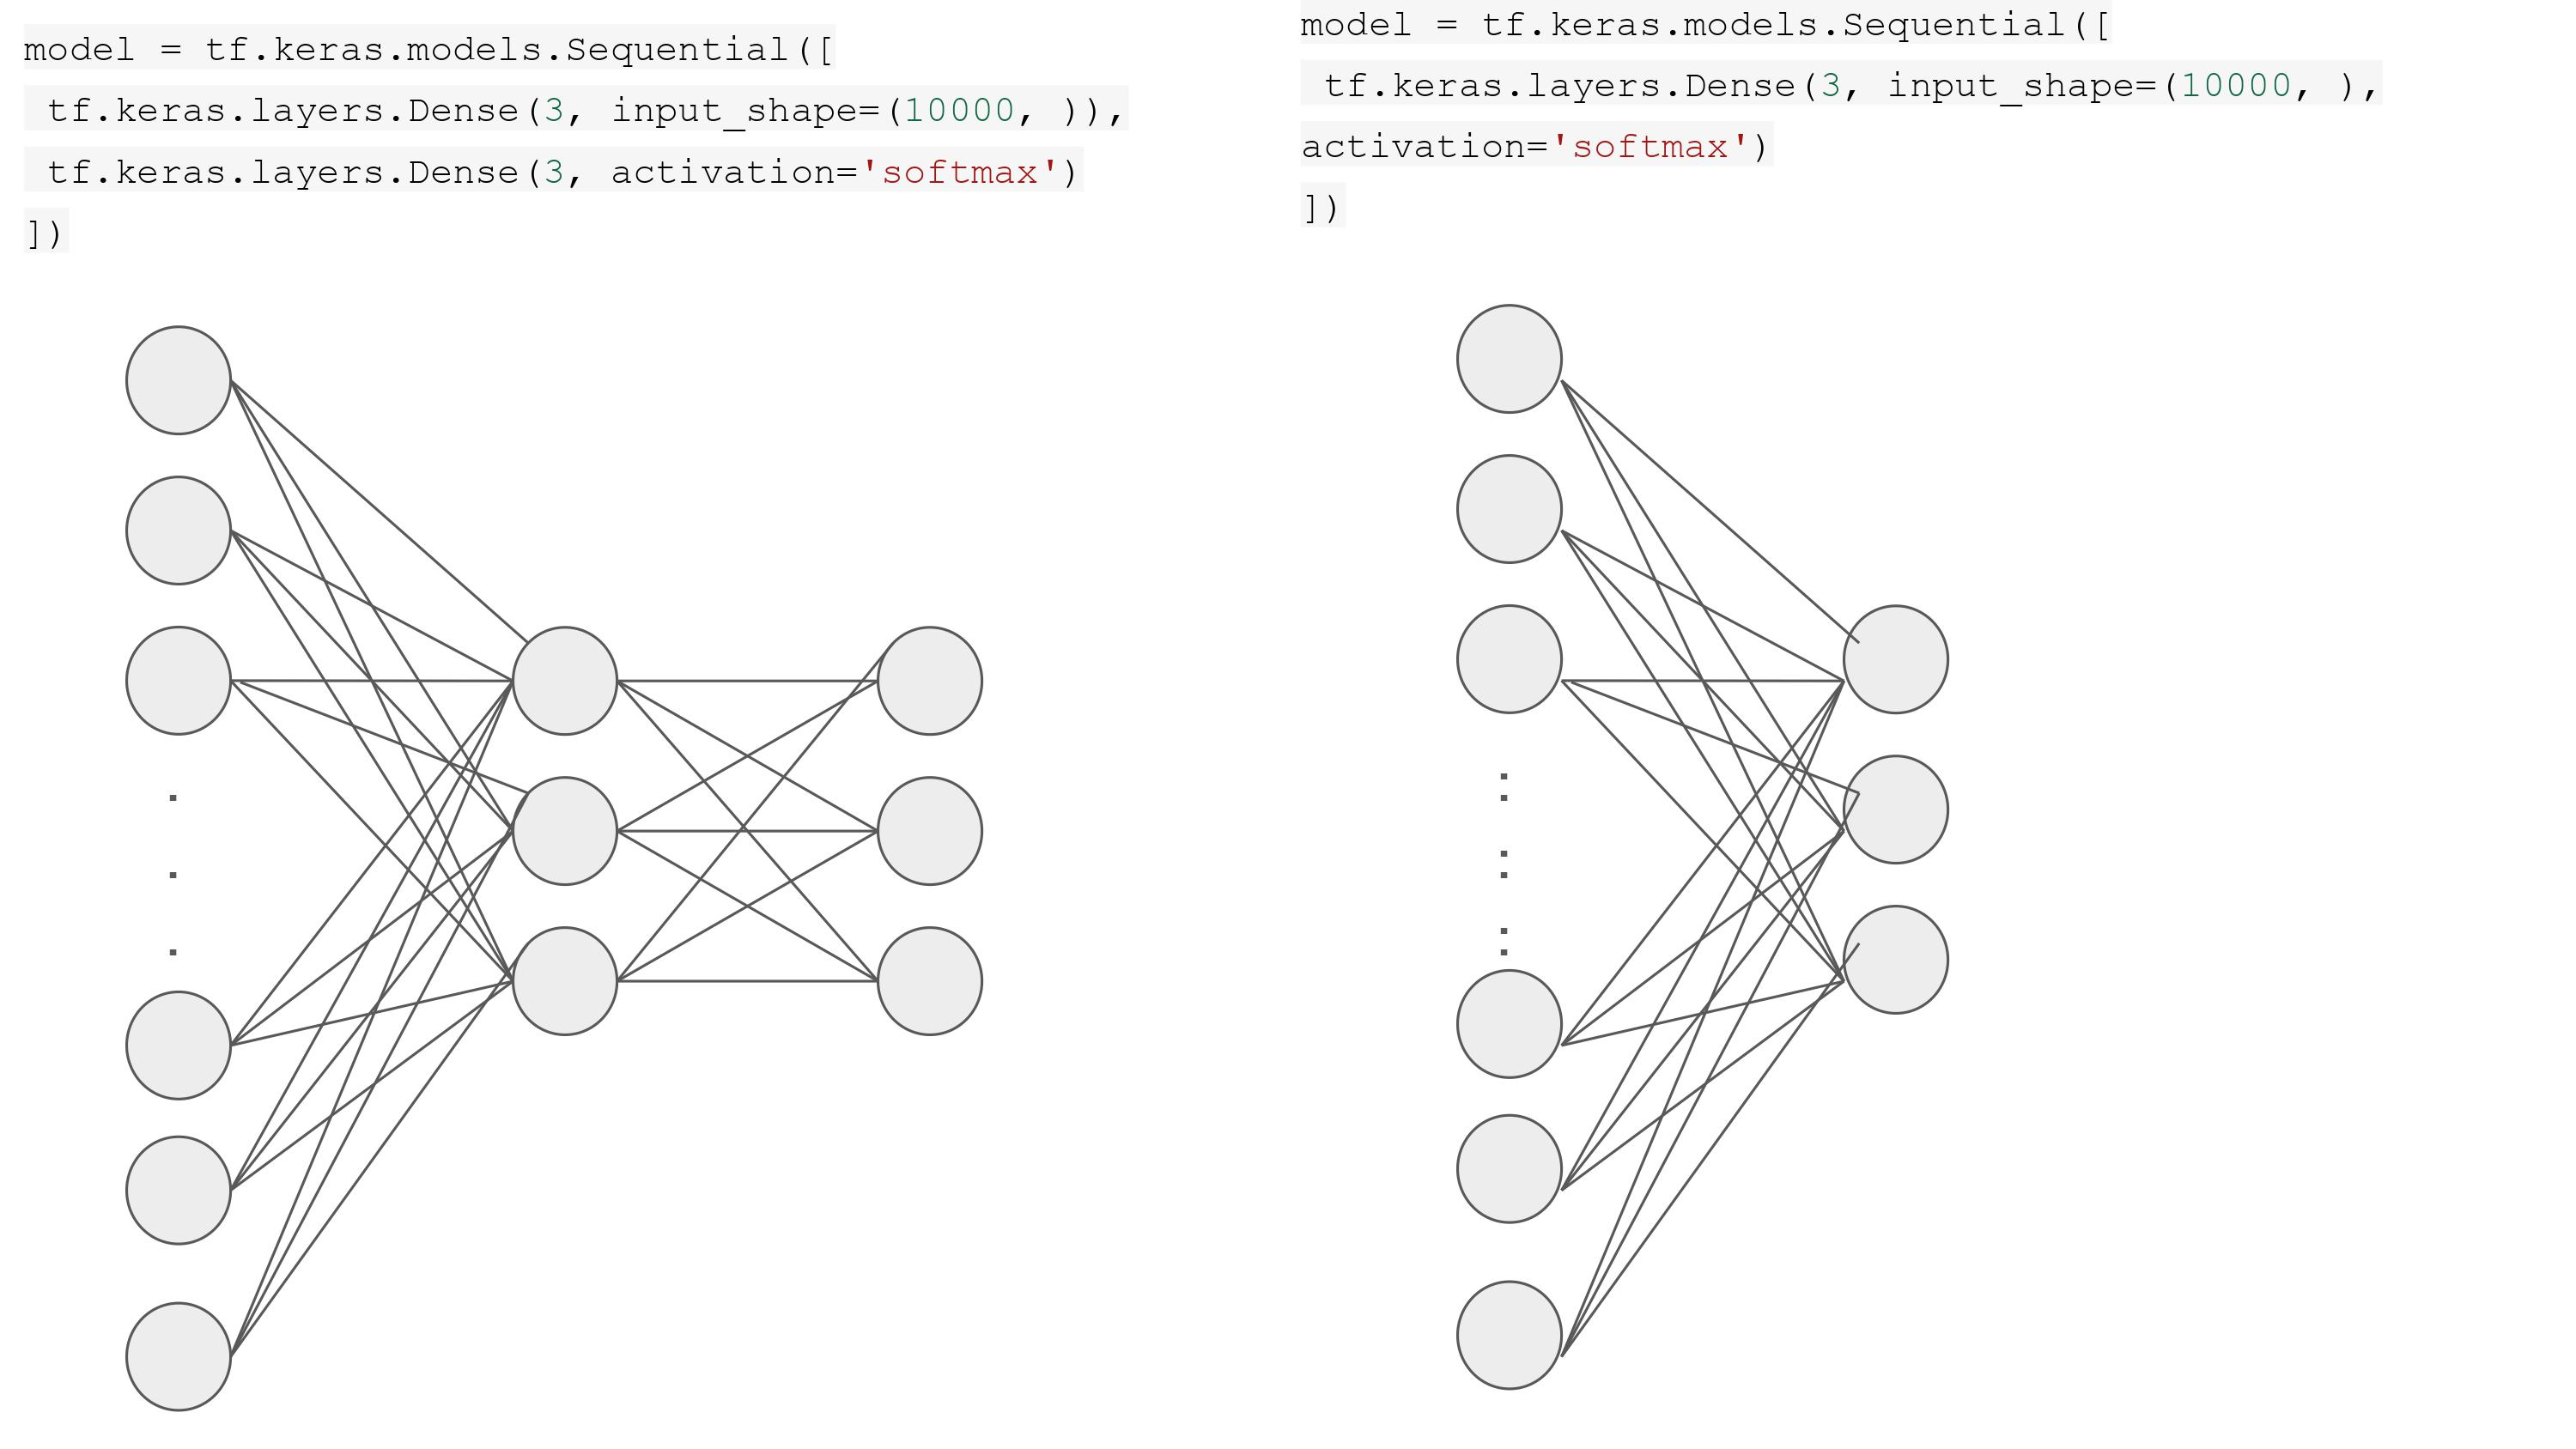

## Preprocessing the dataset for regression
1. Standardization : Change data into the distribution with mean 0 and std1

$$x_{new} = \frac{x-mean(X)}{SD(x)}$$

2. Min-Max normalization : change date with max 1 and min 0

$$x_{new} = \frac{x-min(X)}{max(X)-min(X)}$$


2025.1.15
1. Try with three node

2. Try Eq.(11)

In [14]:
import zipfile
import tensorflow as tf
import os
# import  imageio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from keras.utils import to_categorical #For keras > 2.0
# import cv2
import scipy.io
from sklearn.model_selection import train_test_split
from keras import initializers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from pyESN.pyESN import ESN

In [16]:
mat = scipy.io.loadmat('case3_quantum.mat')
ns = mat['ns']
g2 = mat['g2_a']
Delta = mat['Delta1_vector']

In [90]:
# mat['n']

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sat Feb 15 13:31:35 2025',
 '__version__': '1.0',
 '__globals__': [],
 'Delta1_vector': array([[-5.  , -4.99, -4.98, -4.97, -4.96, -4.95, -4.94, -4.93, -4.92,
         -4.91, -4.9 , -4.89, -4.88, -4.87, -4.86, -4.85, -4.84, -4.83,
         -4.82, -4.81, -4.8 , -4.79, -4.78, -4.77, -4.76, -4.75, -4.74,
         -4.73, -4.72, -4.71, -4.7 , -4.69, -4.68, -4.67, -4.66, -4.65,
         -4.64, -4.63, -4.62, -4.61, -4.6 , -4.59, -4.58, -4.57, -4.56,
         -4.55, -4.54, -4.53, -4.52, -4.51, -4.5 , -4.49, -4.48, -4.47,
         -4.46, -4.45, -4.44, -4.43, -4.42, -4.41, -4.4 , -4.39, -4.38,
         -4.37, -4.36, -4.35, -4.34, -4.33, -4.32, -4.31, -4.3 , -4.29,
         -4.28, -4.27, -4.26, -4.25, -4.24, -4.23, -4.22, -4.21, -4.2 ,
         -4.19, -4.18, -4.17, -4.16, -4.15, -4.14, -4.13, -4.12, -4.11,
         -4.1 , -4.09, -4.08, -4.07, -4.06, -4.05, -4.04, -4.03, -4.02,
         -4.01, -4.  , -3.99, -3.98, -3.97, -3.96, -

In [17]:
ns[0][700]

array([[0.09763082, 0.11635284, 0.14410107, 0.17798029, 0.21524007,
        0.2534241 , 0.2904749 , 0.32479413, 0.35526162, 0.381219  ,
        0.33356859, 0.29093739, 0.25359969, 0.22160409, 0.19480799,
        0.172915  , 0.15551283, 0.14210977, 0.13216826, 0.12513443,
        0.09252609, 0.09746599, 0.10538188, 0.11617408, 0.12977361,
        0.1460699 , 0.16486218, 0.18583442, 0.20855182, 0.23247507,
        0.23513882, 0.23746942, 0.23870446, 0.23835806, 0.23618109,
        0.23211901, 0.22626974, 0.21884336, 0.21012515, 0.20044296]])

# Normalization with each sample or whole sample

# 3 nodes and pick more points

In [75]:
g2_re = []
n_s = []
for i in range(np.shape(g2)[1]):
# for i in range(np.shape(n1)[1]):
    input = np.reshape(ns[0][i],len(ns[0][0][0]))
    # input = input/sum(input)
    n_s.append(input)
    g2_re.append({abs(g2[0][i]):Delta[0][i]})
    # g2_re.append(abs(g2[0][i]))

In [77]:
# n_new = []
# for i in range(np.shape(g2)[1]):
#     n_new.append(np.concatenate((n_s[i], n_s[i]**2, n_s[i]**3)))


In [79]:
# X = np.array(ns,(1000,))
X = np.array(n_s)
Y = np.reshape(g2_re,(1000,))
# X, Y = shuffle(X,Y)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
scaler = StandardScaler()
# scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
Y_train_g2 = []
Y_train_r = []

Y_test_g2 = []
Y_test_r = []

for ele in Y_train:
  key = list(ele.keys())
  value = list(ele.values())
  Y_train_g2.append(key)
  Y_train_r.append(value[0])
Y_train_g2 = np.reshape(Y_train_g2,(len(Y_train_g2),1))

for ele in Y_test:
  key = list(ele.keys())
  value = list(ele.values())
  Y_test_g2.append(key[0])
  Y_test_r.append(value[0])
Y_test_g2 = np.reshape(Y_test_g2,(len(Y_test_g2),1))

In [84]:
#Initialize the ESN model
esn = ESN(n_inputs=40, n_outputs=1,
          n_reservoir=100,  # Number of neurons in the reservoir
          spectral_radius=1,
          teacher_forcing=None,
          # sparsity=1,
          random_state=42)

# Train ESN on the data
esn.fit(X_train, Y_train_g2)

# Predict on test data
y_pred = esn.predict(X_test)

0.3319005747291432


Text(0.5, 1.0, 'ESN')

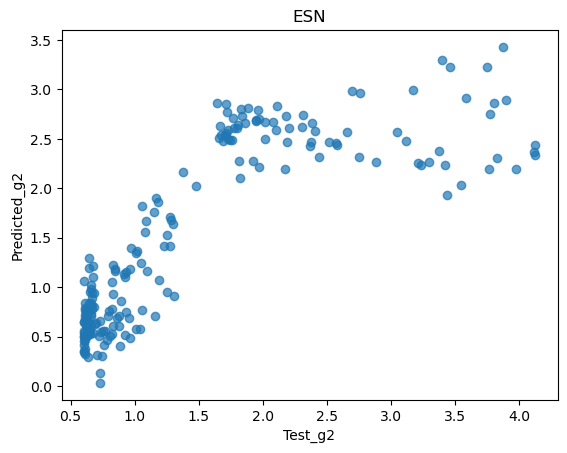

In [86]:
error = mean_squared_error(Y_test_g2,y_pred)
print(error)
plt.scatter(Y_test_g2, y_pred, alpha=0.7, label="Predicted vs True")
plt.xlabel('Test_g2')
plt.ylabel('Predicted_g2')
plt.title('ESN')


(0.0, 5.0)

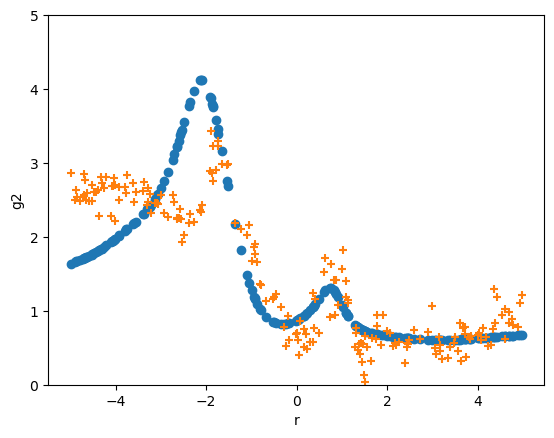

In [88]:
# plt.scatter(Y_test_r, Y_test_g2)
plt.scatter(Y_test_r, Y_test_g2)
plt.scatter(Y_test_r, y_pred,marker="+")
plt.xlabel('r')
plt.ylabel('g2')
plt.ylim([0,5])
# plt.title('reservoir+ESN')

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train_g2)

# 테스트 결과 예측
Y_predict_linear_regression = regressor.predict(X_test)
# 출처: https://giveme-happyending.tistory.com/185 [소연의_개발일지:티스토리]

In [ ]:
error = mean_squared_error(Y_test_g2,Y_predict)
print(error)
plt.scatter(Y_test_g2[:,0], Y_predict[:,0])
# plt.ylim([0, 0.7])
# plt.xlim([0.7, 0.9])
plt.xlabel('s_test')
plt.ylabel('s_predict')


In [ ]:
plt.scatter(Y_test_r, Y_test_g2[:,0])
plt.scatter(Y_test_r, Y_predict[:,0],marker="+")
plt.xlabel('r')
plt.ylabel('g2')
# plt.title('3 nodes')

In [ ]:
Y_test_r_6 = Y_test_r
Y_predict_6 = Y_predict[:,0]
Y_test_g2_6 = Y_test_g2

In [ ]:
Y_test_r_16 = Y_test_r
Y_predict_16 = Y_predict[:,0]
Y_test_g2_16 = Y_test_g2

In [ ]:
Y_test_r_8 = Y_test_r
Y_predict_8 = Y_predict[:,0]
Y_test_g2_8 = Y_test_g2

In [ ]:
Y_test_r_4 = Y_test_r
Y_predict_4 = Y_predict[:,0]
Y_test_g2_4 = Y_test_g2

In [ ]:
Y_predict_6

In [ ]:
# plt.subplot(2,1,1)
plt.scatter(Y_test_g2[:,0], Y_predict_linear_regression[:,0])
# plt.ylim([0.7, 0.9])
# plt.xlim([0.7, 0.9])
plt.xlabel('s_test')
plt.ylabel('s_predict')
# plt.subplot(2,1,2)


In [ ]:
plt.scatter(Y_test_r, Y_test_g2[:,0])
plt.scatter(Y_test_r, Y_predict_linear_regression[:,0],marker="+")
plt.xlabel('r')
plt.ylabel('g2')
plt.title('3 nodes')

In [ ]:
Y_test